In [2]:
library(dplyr) # for data manipulation
library(stringr) # for data manipulation
library(caret) # for sampling
library(caTools) # for train/test split
library(ggplot2) # for data visualization
library(DMwR) # for smote implementation
library(ROSE)# for ROSE sampling
library(randomForest) # for xgboost model
library(gbm)
install.packages("corrplot")
library(corrplot)
install.packages("ggplot2")
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'caTools' was built under R version 3.6.3"Warning message:
"package 'DMwR' was built under R version 3.6.3"Loading required package: grid
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'ROSE' was built under R version 3.6.3"Loaded ROSE 0.0-3

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hande\AppData\Local\Temp\RtmpOMaGAz\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'ggplot2' is in use and will not be installed"


   a    b 
1565  509 


        a         b 
0.7545805 0.2454195 


   a    b 
1424 1068 


  a   b 
713 739 


  a   b 
356 356 


   a    b 
1096 1096 

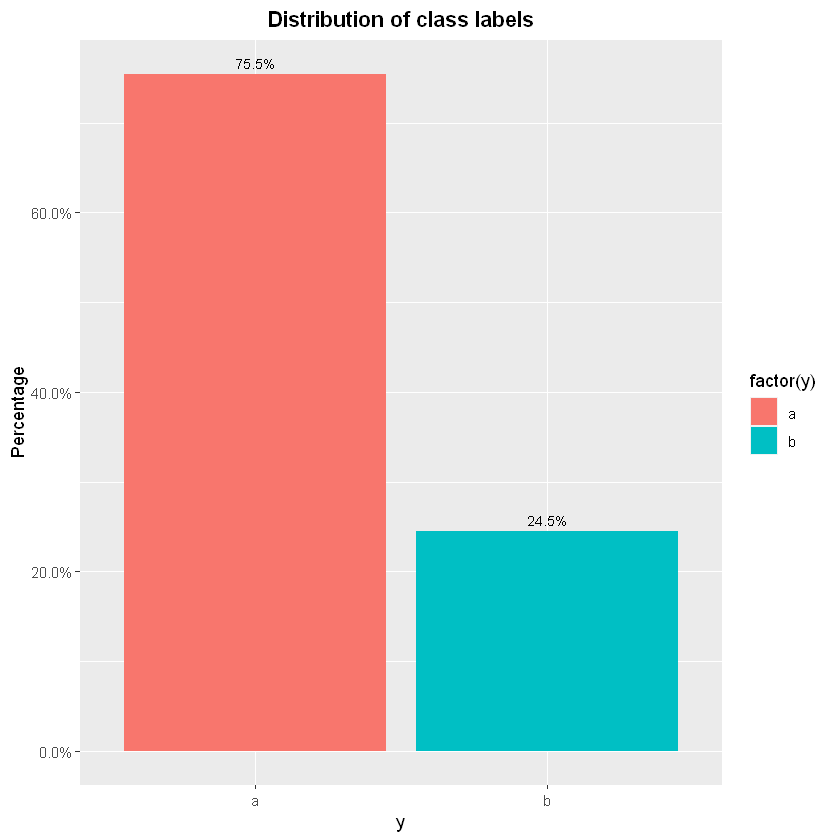

In [6]:
data_train=read.csv("IE582_Fall20_ProjectTrain.csv")
data_test=read.csv("IE582_Fall20_ProjectTest.csv")
#colSums(is.na(data_train))
#str(data_train)
table(data_train$y)
prop.table(table(data_train$y))

common_theme <- theme(plot.title = element_text(hjust = 0.5, face = "bold"))

ggplot(data = data_train, aes(x = factor(y), 
                          y = prop.table(stat(count)), fill = factor(y),
                          label = scales::percent(prop.table(stat(count))))) +
    geom_bar(position = "dodge") + 
    geom_text(stat = 'count',
              position = position_dodge(.9), 
              vjust = -0.5, 
              size = 3) + 
    scale_x_discrete(labels = c("a", "b"))+
    scale_y_continuous(labels = scales::percent)+
    labs(x = 'y', y = 'Percentage') +
    ggtitle("Distribution of class labels") +
    common_theme


set.seed(123)
split <- sample.split(data_train$y, SplitRatio = 0.7)
train <-  subset(data_train, split == TRUE)
validation <- subset(data_train, split == FALSE)

set.seed(9560)
smote_train <- SMOTE(y~ ., data  = train)
table(smote_train$y)

set.seed(9560)
rose_train <- ROSE(y ~ ., data  = train)$data
table(rose_train$y) 

set.seed(9560)
down_train <- downSample(x = train[, -ncol(train)],y = train$y)

set.seed(9560)
up_train <- upSample(x = train[, -ncol(train)],y = train$y)

table(down_train$Class)
table(up_train$Class)

Warning message in cor(com, method = "spearman"):
"the standard deviation is zero"

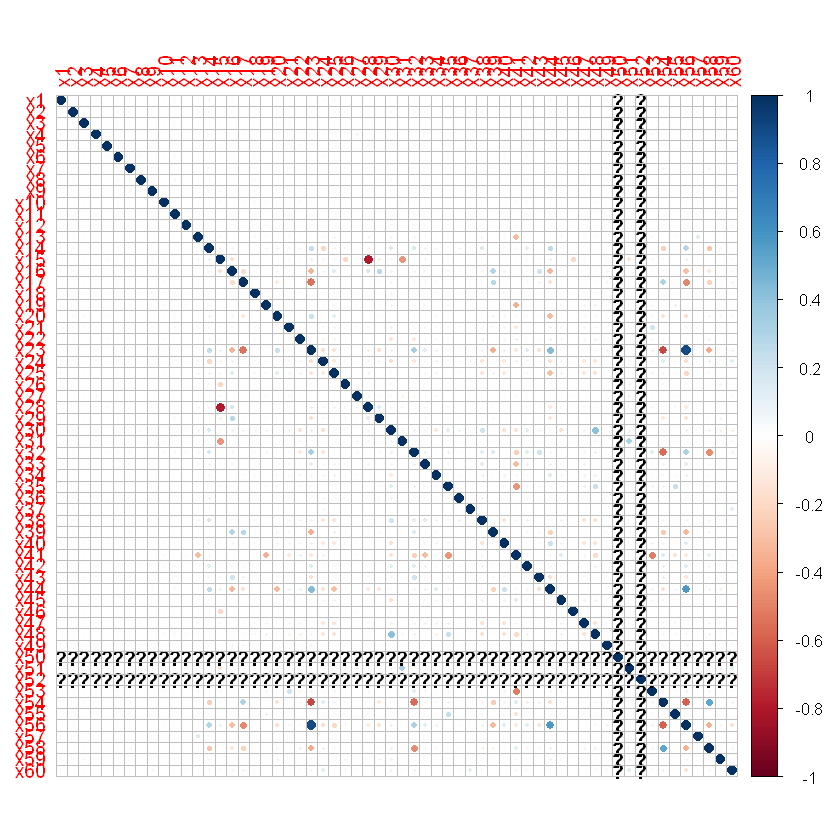

In [7]:
com=data_train[,1:60]
cc = cor(com, method = "spearman")
corrplot(cc)


Call:
 randomForest(formula = y ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 15.98%
Confusion matrix:
     a   b class.error
a 1036  60  0.05474453
b  172 184  0.48314607

Area under the curve (AUC): 0.743

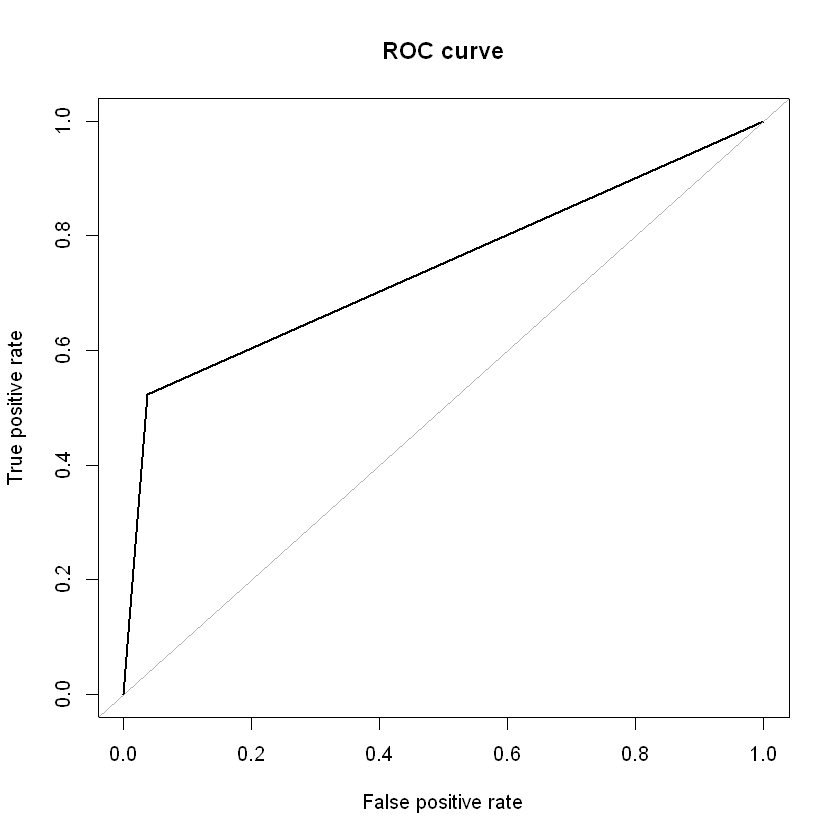

Area under the curve (AUC): 0.748

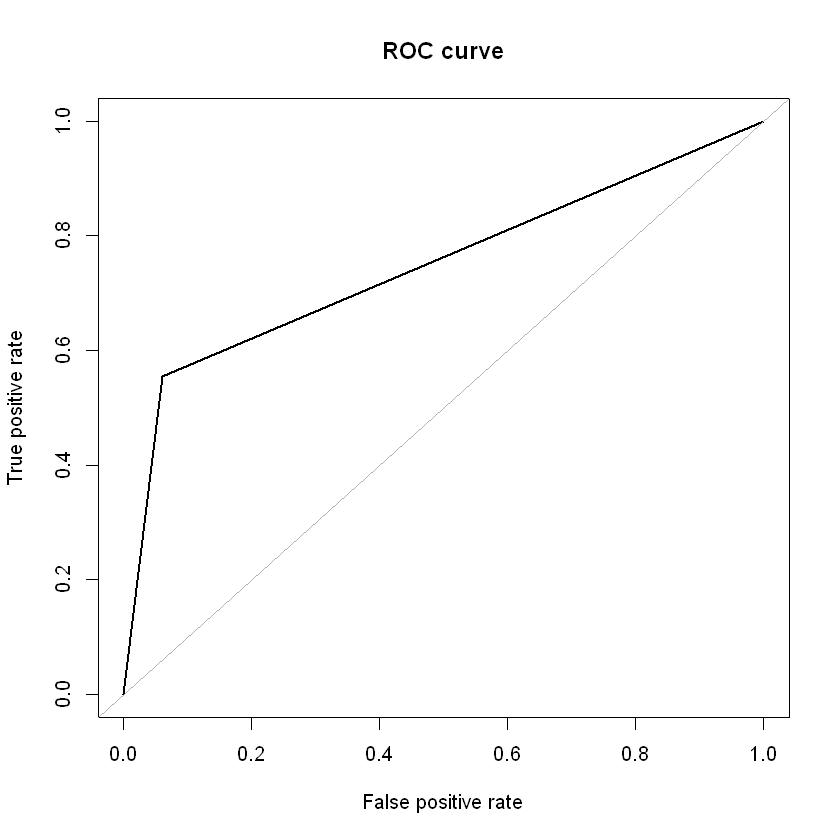

Area under the curve (AUC): 0.678

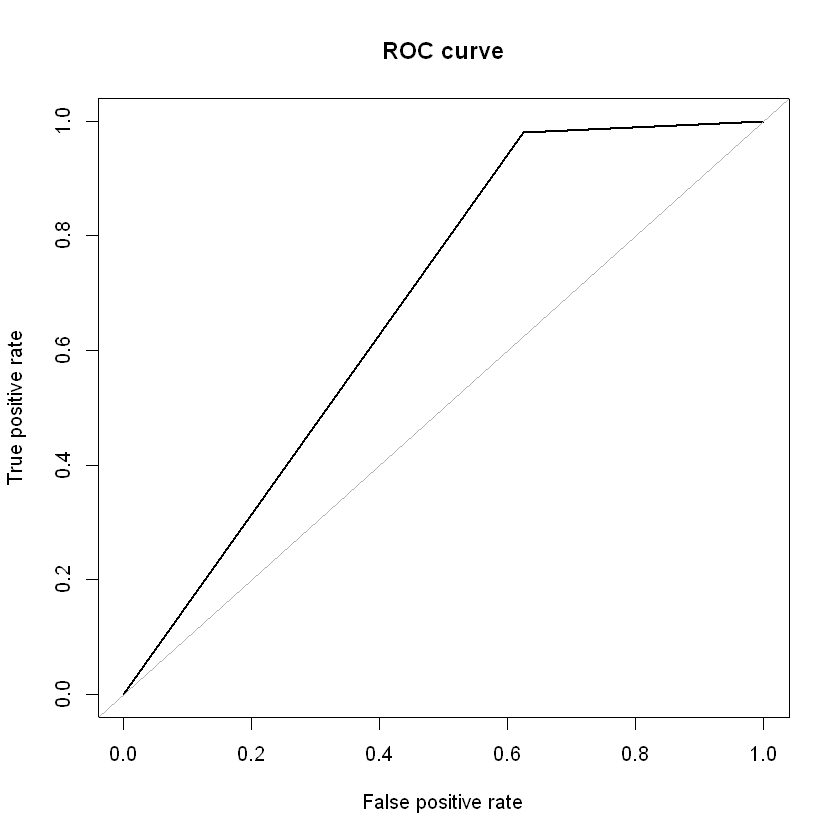

Area under the curve (AUC): 0.793

,MeanDecreaseGini
x1,11.47372036
x2,2.70093717
x3,2.64937261
x4,2.53200221
x5,11.18896969
x6,11.87350074
x7,11.74034991
x8,13.71019002
x9,15.37002828
x10,17.66022801


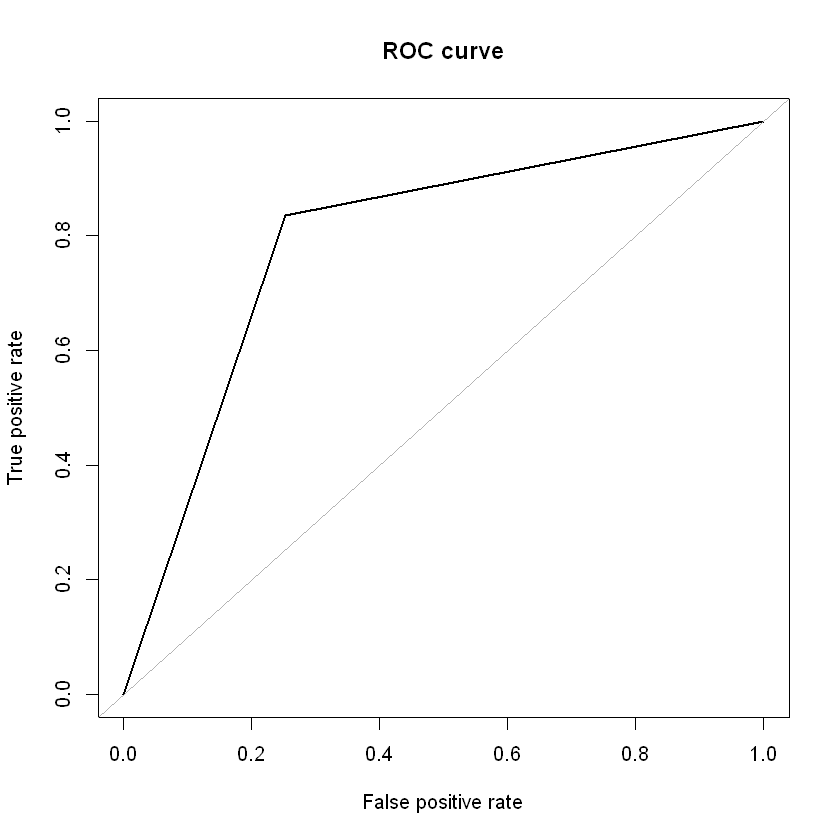

Area under the curve (AUC): 0.751

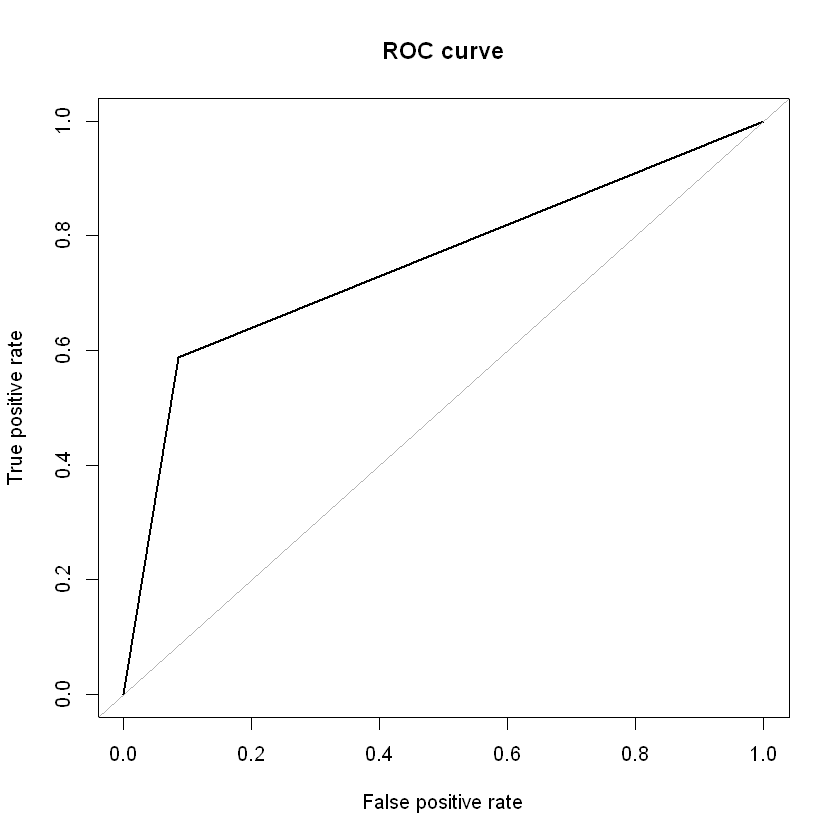

In [8]:
set.seed(5627)

orig_fit <- randomForest(y ~ ., data = train)
orig_fit
#Evaluate model performance on test set
pred_orig <- predict(orig_fit, newdata = validation, method = "class")
roc.curve(validation$y, pred_orig, plotit = TRUE)
#confusionMatrix(pred_orig,validation$y,positive="b")

set.seed(5627)

fit2 <- randomForest(y ~ ., data = smote_train)

#Evaluate model performance on test set
pred2<- predict(fit2, newdata = validation, method = "class")
roc.curve(validation$y, pred2, plotit = TRUE)
#confusionMatrix(pred2,validation$y,positive="b")

set.seed(5627)

fit3 <- randomForest(y ~ ., data = rose_train)

#Evaluate model performance on test set
pred3<- predict(fit3, newdata = validation, method = "class")
roc.curve(validation$y, pred3, plotit = TRUE)
#confusionMatrix(pred3,validation$y,positive="b")
set.seed(5627)

fit4 <- randomForest(Class ~ ., data = down_train)

#Evaluate model performance on test set
pred4= predict(fit4, newdata = validation, method = "class")
roc.curve(validation$y, pred4, plotit = TRUE)
#confusionMatrix(pred4,validation$y,positive="b")

importance(fit4)

set.seed(5627)

fit5 <- randomForest(Class ~ ., data = up_train)

#Evaluate model performance on test set
pred5<- predict(fit5, newdata = validation, method = "class")
roc.curve(validation$y, pred5, plotit = TRUE)
#confusionMatrix(pred5,validation$y,positive="b")

In [73]:

data_train=read.csv("IE582_Fall20_ProjectTrain.csv")
data_test=read.csv("IE582_Fall20_ProjectTest.csv")
str(data_train)
names <- c(1,5:11,14,27,30,32,36,42,52,37,51,50,57,61)
data_train[,-(names)] <- lapply(data_train[,-(names)] , factor)
#str(data_train)
names <- c(1,5:11,14,27,30,32,36,42,57,37,52,50,51,61)
data_test[,-(names)] <- lapply(data_test[,-(names)] , factor)
#str(data_test)

data_train[,c(1,5:11,14,27,30,32,36,42)] <- as.data.frame(scale(data_train[,c(1,5:11,14,27,30,32,36,42)]))
str(data_train)


down_train = downSample(x = data_train[, -ncol(data_train)],y = data_train$y)


fit = randomForest(Class ~ ., data = down_train,mtry=16, nodesize=14,ntree=100)

#Evaluate model performance on test set
pred= predict(fit, newdata = data_test, type = "prob")
predictions=pred[,2]




'data.frame':	2074 obs. of  61 variables:
 $ x1 : int  27 30 37 29 33 33 29 27 28 27 ...
 $ x2 : int  1 0 0 0 1 0 1 1 1 0 ...
 $ x3 : int  1 1 1 1 1 0 0 1 1 1 ...
 $ x4 : int  1 1 1 1 0 1 1 1 1 0 ...
 $ x5 : int  18 18 1 14 2 5 16 13 0 8 ...
 $ x6 : int  3 13 3 9 15 5 1 4 0 18 ...
 $ x7 : int  1 3 14 3 12 12 2 17 2 18 ...
 $ x8 : int  28 19 33 29 39 26 24 34 40 26 ...
 $ x9 : num  119.9 86.7 174 8.8 55 ...
 $ x10: num  154 133 128 127 188 ...
 $ x11: num  121.4 129 100.2 55.5 156.6 ...
 $ x12: int  1 0 0 1 1 0 0 0 0 1 ...
 $ x13: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x14: int  404 303 454 383 404 404 404 30 202 404 ...
 $ x15: int  1 1 1 1 0 1 0 1 1 1 ...
 $ x16: int  0 0 0 1 0 0 0 0 1 0 ...
 $ x17: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x18: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x19: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x20: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x21: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x22: int  0 1 0 0 0 0 0 0 0 0 ...
 $ x23: int  1 1 1 0 1 0 1 0 0 0 ...
 $ x24: int  0 0 0 1 0 0 0 1 1 0 ...
 $ x25: i

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
0.48 0.52 0.45 0.58 0.49 0.74 0.45 0.39 0.64 0.49 0.41 0.39 0.55 0.59 0.61 0.54 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
0.54 0.49 0.37 0.52 0.62 0.45 0.73 0.47 0.48 0.59 0.43 0.59 0.51 0.50 0.40 0.39 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
0.48 0.43 0.48 0.38 0.50 0.57 0.63 0.47 0.58 0.54 0.62 0.40 0.60 0.50 0.59 0.58 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
0.42 0.57 0.58 0.62 0.61 0.42 0.55 0.62 0.44 0.43 0.78 0.43 0.63 0.53 0.70 0.60 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
0.63 0.58 0.47 0.49 0.75 0.64 0.41 0.55 0.47 0.41 0.71 0.61 0.48 0.59 0.40 0.56 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
0.64 0.74 0.56 0.46 0.40 0.49 0.62 0.58 0.64 0.75 0.61 0.57 0.55 0.41 0.56 0.39 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
0.60 0.72 0.45 0.43 0.39 0.51 0.38 0.38 0.42 0.43 0.55 0.59 0.41 0.57 0.57 0.49 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
0.58 0.49 0.34 0.47 0.46 0.47 0.63 0.48 0.54 0.53 0.57 0.63 0.41 0.54 0.57 0.70 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
0.35 0.50 0.33 0.37 0.38 0.45 0.44 0.48 0.59 0.48 0.58 0.42 0.44 0.63 0.44 0.48 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
0.40 0.40 0.45 0.43 0.62 0.62 0.57 0.46 0.61 0.58 0.54 0.61 0.60 0.37 0.43 0.49 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
0.63 0.58 0.51 0.61 0.56 0.38 0.59 0.44 0.49 0.77 0.44 0.47 0.44 0.60 0.47 0.54 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
0.40 0.42 0.49 0.50 0.38 0.61 0.47 0.47 0.40 0.55 0.47 0.66 0.61 0.71 0.49 0.42 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
0.42 0.40 0.49 0.51 0.58 0.58 0.52 0.40 0.48 0.60 0.39 0.44 0.38 0.37 0.57 0.49 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
0.57 0.61 0.61 0.50 0.50 0.40 0.54 0.41 0.61 0.59 0.59 0.62 0.61 0.46 0.42 0.48 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
0.60 0.60 0.73 0.53 0.63 0.49 0.39 0.57 0.45 0.54 0.57 0.58 0.41 0.39 0.40 0.39 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
0.63 0.56 0.58 0.63 0.61 0.56 0.76 0.39 0.76 0.47 0.56 0.58 0.40 0.40 0.58 0.42 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
0.37 0.40 0.54 0.47 0.42 0.74 0.62 0.61 0.43 0.64 0.56 0.62 0.54 0.59 0.47 0.57 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
0.53 0.40 0.55 0.57 0.46 0.61 0.40 0.41 0.45 0.57 0.41 0.59 0.48 0.39 0.52 0.64 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
0.37 0.45 0.44 0.53 0.42 0.39 0.45 0.62 0.47 0.59 0.58 0.54 0.49 0.46 0.61 0.49 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
0.58 0.59 0.57 0.38 0.47 0.48 0.63 0.43 0.40 0.56 0.58 0.40 0.59 0.58 0.47 0.40 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
0.45 0.61 0.46 0.44 0.60 0.49 0.58 0.40 0.57 0.42 0.41 0.63 0.74 0.43 0.40 0.58 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
0.48 0.59 0.52 0.58 0.59 0.58 0.63 0.51 0.59 0.59 0.74 0.40 0.58 0.58 0.58 0.54 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
0.59 0.55 0.59 0.41 0.50 0.63 0.57 0.56 0.45 0.58 0.41 0.62 0.39 0.60 0.43 0.54 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
0.50 0.50 0.56 0.61 0.48 0.63 0.64 0.56 0.67 0.50 0.50 0.40 0.46 0.48 0.64 0.58 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
0.62 0.61 0.52 0.41 0.62 0.37 0.49

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
0.38 0.62 0.35 0.68 0.39 0.84 0.35 0.29 0.74 0.39 0.31 0.29 0.65 0.69 0.71 0.64 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
0.64 0.39 0.27 0.62 0.72 0.35 0.83 0.37 0.38 0.69 0.33 0.69 0.61 0.60 0.30 0.29 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
0.38 0.33 0.38 0.28 0.60 0.67 0.73 0.37 0.68 0.64 0.72 0.30 0.70 0.60 0.69 0.68 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
0.32 0.67 0.68 0.72 0.71 0.32 0.65 0.72 0.34 0.33 0.88 0.33 0.73 0.63 0.80 0.70 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
0.73 0.68 0.37 0.39 0.85 0.74 0.31 0.65 0.37 0.31 0.81 0.71 0.38 0.69 0.30 0.66 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
0.74 0.84 0.66 0.36 0.30 0.39 0.72 0.68 0.74 0.85 0.71 0.67 0.65 0.31 0.66 0.29 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
0.70 0.82 0.35 0.33 0.29 0.61 0.28 0.28 0.32 0.33 0.65 0.69 0.31 0.67 0.67 0.39 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
0.68 0.39 0.24 0.37 0.36 0.37 0.73 0.38 0.64 0.63 0.67 0.73 0.31 0.64 0.67 0.80 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
0.25 0.60 0.23 0.27 0.28 0.35 0.34 0.38 0.69 0.38 0.68 0.32 0.34 0.73 0.34 0.38 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
0.30 0.30 0.35 0.33 0.72 0.72 0.67 0.36 0.71 0.68 0.64 0.71 0.70 0.27 0.33 0.39 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
0.73 0.68 0.61 0.71 0.66 0.28 0.69 0.34 0.39 0.87 0.34 0.37 0.34 0.70 0.37 0.64 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
0.30 0.32 0.39 0.60 0.28 0.71 0.37 0.37 0.30 0.65 0.37 0.76 0.71 0.81 0.39 0.32 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
0.32 0.30 0.39 0.61 0.68 0.68 0.62 0.30 0.38 0.70 0.29 0.34 0.28 0.27 0.67 0.39 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
0.67 0.71 0.71 0.60 0.60 0.30 0.64 0.31 0.71 0.69 0.69 0.72 0.71 0.36 0.32 0.38 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
0.70 0.70 0.83 0.63 0.73 0.39 0.29 0.67 0.35 0.64 0.67 0.68 0.31 0.29 0.30 0.29 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
0.73 0.66 0.68 0.73 0.71 0.66 0.86 0.29 0.86 0.37 0.66 0.68 0.30 0.30 0.68 0.32 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
0.27 0.30 0.64 0.37 0.32 0.84 0.72 0.71 0.33 0.74 0.66 0.72 0.64 0.69 0.37 0.67 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
0.63 0.30 0.65 0.67 0.36 0.71 0.30 0.31 0.35 0.67 0.31 0.69 0.38 0.29 0.62 0.74 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
0.27 0.35 0.34 0.63 0.32 0.29 0.35 0.72 0.37 0.69 0.68 0.64 0.39 0.36 0.71 0.39 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
0.68 0.69 0.67 0.28 0.37 0.38 0.73 0.33 0.30 0.66 0.68 0.30 0.69 0.68 0.37 0.30 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
0.35 0.71 0.36 0.34 0.70 0.39 0.68 0.30 0.67 0.32 0.31 0.73 0.84 0.33 0.30 0.68 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
0.38 0.69 0.62 0.68 0.69 0.68 0.73 0.61 0.69 0.69 0.84 0.30 0.68 0.68 0.68 0.64 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
0.69 0.65 0.69 0.31 0.60 0.73 0.67 0.66 0.35 0.68 0.31 0.72 0.29 0.70 0.33 0.64 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
0.60 0.60 0.66 0.71 0.38 0.73 0.74 0.66 0.77 0.60 0.60 0.30 0.36 0.38 0.74 0.68 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
0.72 0.71 0.62 0.31 0.72 0.27 0.39

In [4]:
data_train=read.csv("IE582_Fall20_ProjectTrain.csv")
data_test=read.csv("IE582_Fall20_ProjectTest.csv")

set.seed(9560)
down_train <- downSample(x = data_train[, -ncol(data_train)],y = data_train$y)

control <- trainControl(method='repeatedcv', 
                        number=10, 
                        repeats=3, 
                        search='grid')

tunegrid <-  data.frame( .mtry = c(1:60))

rf_gridsearch <- train(Class ~ ., 
                       data = down_train,
                       method = 'rf',
                       metric = 'Accuracy',
                       tuneGrid = tunegrid)
print(rf_gridsearch)

Random Forest 

1018 samples
  60 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1018, 1018, 1018, 1018, 1018, 1018, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.7595538  0.5189058
   2    0.7648288  0.5289174
   3    0.7775127  0.5545084
   4    0.7806351  0.5609844
   5    0.7826799  0.5651887
   6    0.7818716  0.5635945
   7    0.7802637  0.5604165
   8    0.7795381  0.5588986
   9    0.7816684  0.5631484
  10    0.7823369  0.5645069
  11    0.7809090  0.5616828
  12    0.7820796  0.5640402
  13    0.7806006  0.5610322
  14    0.7813484  0.5625263
  15    0.7812395  0.5622901
  16    0.7829095  0.5656045
  17    0.7816862  0.5632093
  18    0.7823218  0.5644693
  19    0.7804419  0.5607390
  20    0.7820555  0.5639683
  21    0.7787752  0.5574183
  22    0.7791765  0.5582762
  23    0.7794847  0.5588246
  24    0.7796290  0.5591039
  25    0.7774118  0.5546727
  26    0.7

In [5]:
data_train=read.csv("IE582_Fall20_ProjectTrain.csv")
data_test=read.csv("IE582_Fall20_ProjectTest.csv")

set.seed(9560)
down_train <- downSample(x = data_train[, -ncol(data_train)],y = data_train$y)



control <- trainControl(method = 'repeatedcv',
                        number = 10,
                        repeats = 3,
                        search = 'grid')
#create tunegrid
tunegrid <- expand.grid(.mtry = 16)
modellist <- list()

#train with different ntree parameters
for (ntree in c(50,100,150,200,300,500)){
  fit <- train(Class~.,
               data = down_train,
               method = 'rf',
               metric = 'Accuracy',
               tuneGrid = tunegrid,
               trControl = control,
               ntree=ntree)
  key <- toString(ntree)
  modellist[[key]] <- fit
}

#Compare results
results <- resamples(modellist)
summary(results)


Call:
summary.resamples(object = results)

Models: 50, 100, 150, 200, 300, 500 
Number of resamples: 30 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
50  0.7058824 0.7377451 0.7684916 0.7740309 0.8112745 0.8431373    0
100 0.7058824 0.7549020 0.7843137 0.7849156 0.8039216 0.8811881    0
150 0.6960784 0.7671569 0.7920588 0.7835358 0.8039216 0.8431373    0
200 0.7156863 0.7500000 0.7843137 0.7799895 0.8034362 0.8333333    0
300 0.7156863 0.7469423 0.7745098 0.7793723 0.8137255 0.9000000    0
500 0.6862745 0.7549505 0.7783440 0.7795897 0.8137255 0.8333333    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
50  0.4117647 0.4754902 0.5370054 0.5480833 0.6225490 0.6862745    0
100 0.4117647 0.5098039 0.5686275 0.5698541 0.6078431 0.7626322    0
150 0.3921569 0.5343137 0.5841176 0.5670424 0.6078431 0.6862745    0
200 0.4313725 0.5000000 0.5686275 0.5599780 0.6069403 0.6666667    0
300 0.4313725 0.4939453 0.5490196 0.5587467 0.6